This is an introduction to computer vision in python for physicists. We're going to look into the mathematics behind CV and do some basic image processing ourselfs. 

Sources: 
- scikit image website
- online lecture of Shree Nayar, First Principles of Computer Vision 

In [92]:
# standard imports 
import numpy as np
import matplotlib.pyplot as plt

# scikit-image imports
from skimage import data
from skimage import draw
from skimage import color
from skimage import exposure
from skimage import filters
from skimage import feature
from skimage import segmentation

# scipy imports
from scipy.fft import fft2, fftshift

# self made functions
import utilities

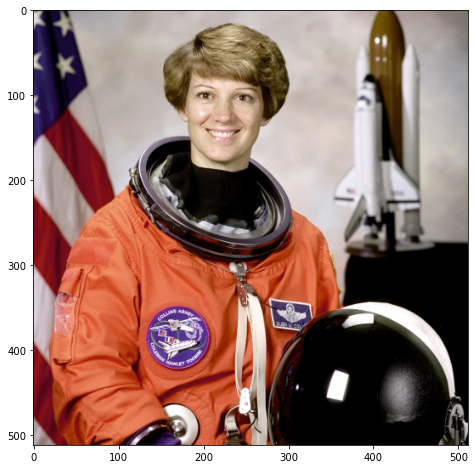

In [2]:
caller = getattr(data, 'astronaut')
img_ast = caller()

plt.figure(figsize = (8,8))
plt.imshow(img_ast)

- Our brain is very adapted to process images
- We immediatly recocnigze important facts about the scene: 
    - Theres a human in the picture
    - It's a woman and an astronaut
    - It's probably in the USA at NASA 
    - etc 
- However, the computer only sees numbers

In [3]:
print(type(img_ast))
print(img_ast.shape)
print(img_ast.dtype)
img_ast

<class 'numpy.ndarray'>
(512, 512, 3)
uint8


array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]


- Color images are 3D arrays or 3 stacked 2d images
- We can use numpy indexing for basic image manipulation
- The first two axis "contain" the position of each pixel
- The 3 last dimensions contain the red, green, and blue channels 
- Image histograms contain the number of pixels for different intensities 


(0.0, 5000.0)

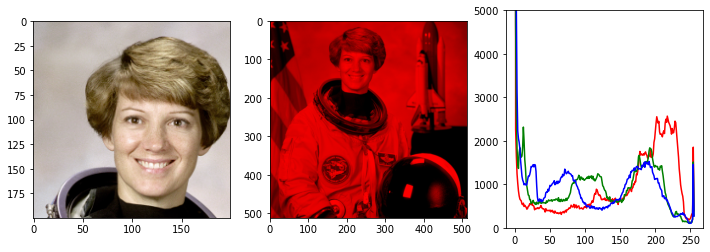

In [4]:
img_cut = img_ast[0:200, 100:300, :]

img_color = img_ast.copy()
img_color = img_color / 255. 
#img_color[:, :, 1:] *= 0.5 
img_color = img_color * np.array([1,0,0])

img_hist, bins = exposure.histogram(img_ast, channel_axis = -1)

fig, ax = plt.subplots(1, 3, figsize = (12,4))
ax[0].imshow(img_cut)
ax[1].imshow(img_color)

for i, c in enumerate(['red','green','blue']):
    ax[2].plot(bins, img_hist[i], color = c)
ax[2].set_ylim(0,5000)    



- Try and play around with the cut out window. Try catch the helmet or the logos on her suit. 
- you can change the color filtering as well, try to make the image purple or yellow for example
- than look at how this changes the color histogram

(512, 512)


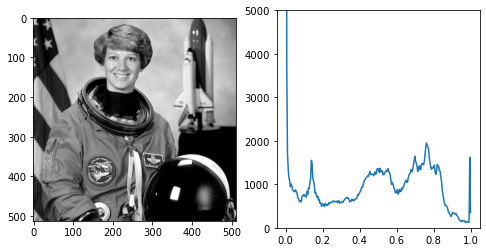

In [5]:
img_gray = color.rgb2gray(img_ast)
img_hist, bins = exposure.histogram(img_gray,)

fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].imshow(img_gray, 'gray')
ax[1].plot(bins, img_hist)
ax[1].set_ylim(0,5000) 
print(img_gray.shape)

- now we converted the image to grayscale, which reduces the number of channels to 1 
- Conversion rule: Y = 0.2125 R + 0.7154 G + 0.0721 B

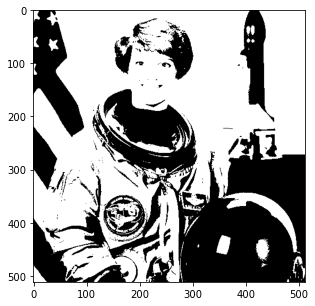

In [111]:
img_thres = img_gray.copy()
thres = 0.4

img_thres[img_thres < thres] = 0
img_thres[img_thres > 0] = 1

fig, ax = plt.subplots(1, 1, figsize = (5,5))
ax.imshow(img_thres, 'gray')

- Thresholding can be useful to create binary images, which are easier to work
    - From binary images one can extract masks or contours for example
- But often a single threshold is not enough to segment complex pictures
- Apply thresholding at 0.4 and look for the optical illusion around her head. Does the white on her head seem whiter than the white in the background? 

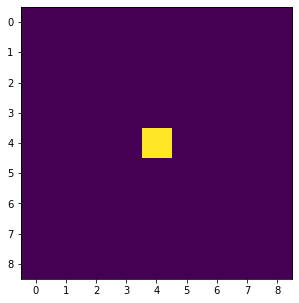

In [6]:
kernel = np.zeros(shape = (9,9))
kernel[4,4] = 1

kernel_gaus = filters.gaussian(kernel, sigma = 1)
kernel_sobel = filters.sobel_h(kernel)
kernel_laplace = filters.laplace(kernel)

plt.figure(figsize = (5,5))
plt.imshow(kernel)                                  

Convolution $$(f * g)(x) = \int_{-\infty}^\infty f(x')g(x - x') dx' $$
- $f$ is the image and $g$ is the kernel
- Kernels are used to filter images
- try convolving some basic filters with our delta distribution kernel 
- google how these basic filters are supposed to look like in continous domain. What are they supposed to do?
- now try convolving our basic kernels with each other. Is the order of convolution important? 

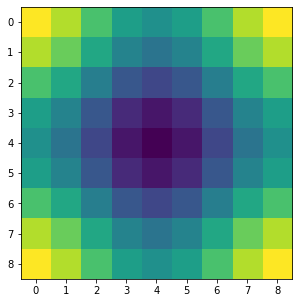

In [7]:
from scipy.fft import fft2, fftshift
img_f = np.abs(fftshift(fft2(kernel_laplace)))

plt.figure(figsize = (5,5))
plt.imshow(img_f)     

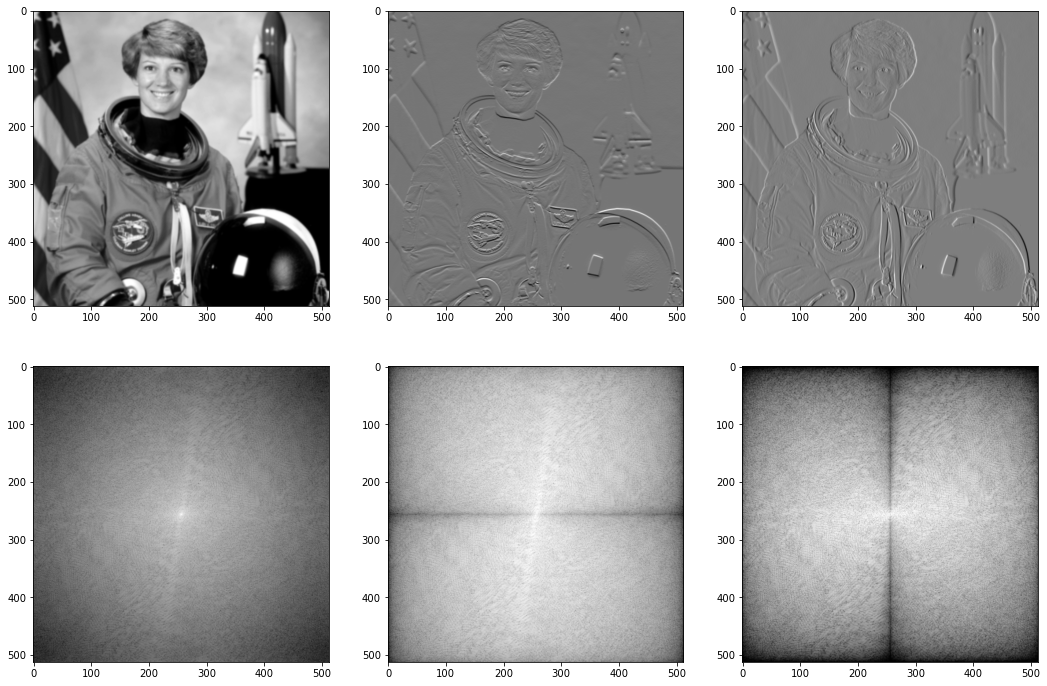

In [8]:
img_gaus = filters.gaussian(img_gray, sigma = 1)
img_sobelh = filters.sobel_h(img_gray)
img_sobelv = filters.sobel_v(img_gray)
img_laplace = filters.laplace(img_gray)

img_f = np.log( np.abs( fftshift( fft2(img_gaus * filters.window('hann', img_gray.shape) ))))
img_f_sh = np.log(np.abs(fftshift(fft2(img_sobelh * filters.window('hann', img_gray.shape) ))))
img_f_sv = np.log(np.abs(fftshift(fft2(img_sobelv * filters.window('hann', img_gray.shape) ))) + 1e-3)

fig, ax = plt.subplots(2, 3, figsize = (18,12))
ax[0,0].imshow(img_gaus, 'gray')
ax[0,1].imshow(img_sobelh, 'gray')
ax[0,2].imshow(img_sobelv, 'gray')

ax[1,0].imshow(img_f, 'gray')
ax[1,1].imshow(img_f_sh, 'gray')
ax[1,2].imshow(img_f_sv, 'gray')

Observations
- here we see the different filters applied to the image
- in the lower row are the ffts of the filtered image
- you can observe how smoothing removes higher frequency components and that the sobel operator increases higher frequency components

Tasks 
- look at how the image and image fft change with increasing sigma
- than apply the sobel and laplace filter to the smoothed image


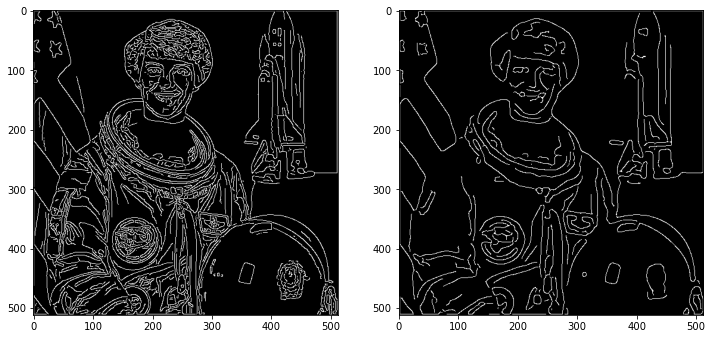

In [9]:
edges1 = feature.canny(img_gray) # , low_threshold = 0.2, high_threshold = 0.3
edges2 = feature.canny(img_gray, sigma = 3)
fig, ax = plt.subplots(1, 2, figsize = (12,6))
ax[0].imshow(edges1, 'gray')
ax[1].imshow(edges2, 'gray')

- The canny edge operator combines smoothin and sobeloperator together with thresholding to extract a binary edge map 
- Try changing the sigma value and introducing different threshold values 

Now it's your time. Bring me her head! No seriously try and segmente the astronauts head with the tools you have learned so far. 